In [1]:
import pandas as pd
import numpy as np

In [2]:
stock = pd.read_csv('final_stock_data.csv')

In [3]:
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Movement
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.0,0.0,1
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.0,0.0,1
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.0,0.0,0
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.0,0.0,0
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.0,0.0,1


In [4]:
labels = pd.read_csv('news_label.csv')

In [5]:
labels.head()

,Date,Sentiment
0,2012-07-16,0.0
1,2012-07-19,0.0
2,2012-07-23,0.0
3,2012-07-24,0.0
4,2012-07-27,0.0


In [6]:
final = pd.merge(stock, labels) 

In [7]:
final.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Movement,Sentiment
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.0,0.0,1,0.0
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.0,0.0,1,0.0
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.0,0.0,0,0.0
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.0,0.0,0,0.0
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.0,0.0,1,0.0


In [8]:
final = final.drop(['Dividends','Stock Splits','Date', 'Sentiment'], axis=1)

In [9]:
final.head()

,Open,High,Low,Close,Volume,Movement
0,18.478158,18.676643,18.475103,18.532818,301260400,1
1,18.666261,18.790544,18.505029,18.759092,436861600,1
2,18.150808,18.501977,17.946521,18.438766,487975600,0
3,18.547165,18.617399,18.276307,18.349901,565132400,0
4,17.558705,17.889109,17.454271,17.868649,403936400,1


In [10]:
final['Sentiment'].value_counts()

KeyError: 'Sentiment'

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1991 non-null   float64
 1   High       1991 non-null   float64
 2   Low        1991 non-null   float64
 3   Close      1991 non-null   float64
 4   Volume     1991 non-null   int64  
 5   Movement   1991 non-null   int64  
 6   Sentiment  1991 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 124.4 KB


In [ ]:
final.corr(method='pearson')

,Open,High,Low,Close,Volume,Movement,Sentiment
Open,1.000000,0.999912,0.999892,0.999749,-0.390073,-0.005057,-0.049931
High,0.999912,1.000000,0.999875,0.999879,-0.388443,-0.001179,-0.050084
Low,0.999892,0.999875,1.000000,0.999890,-0.392467,0.000166,-0.049125
Close,0.999749,0.999879,0.999890,1.000000,-0.390661,0.004701,-0.048916
Volume,-0.390073,-0.388443,-0.392467,-0.390661,1.000000,-0.065470,-0.067169
Movement,-0.005057,-0.001179,0.000166,0.004701,-0.065470,1.000000,0.050534
Sentiment,-0.049931,-0.050084,-0.049125,-0.048916,-0.067169,0.050534,1.000000


<AxesSubplot:>

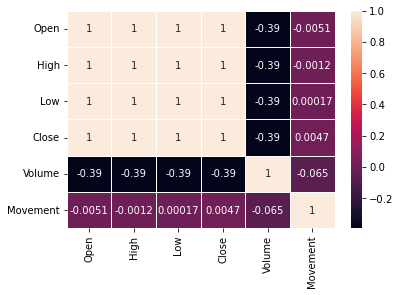

In [12]:
import seaborn as sns
sns.heatmap(final.corr(), linewidth=0.5, annot=True)

In [13]:
final['Close next data'] = final['Close'].shift(-1)
final

,Open,High,Low,Close,Volume,Movement,Close next data
0,18.478158,18.676643,18.475103,18.532818,301260400,1,18.759092
1,18.666261,18.790544,18.505029,18.759092,436861600,1,18.438766
2,18.150808,18.501977,17.946521,18.438766,487975600,0,18.349901
3,18.547165,18.617399,18.276307,18.349901,565132400,0,17.868649
4,17.558705,17.889109,17.454271,17.868649,403936400,1,18.170046
...,...,...,...,...,...,...,...
1986,134.289993,137.339996,132.160004,135.429993,91533000,1,130.059998
1987,132.080002,132.389999,129.039993,130.059998,108123900,0,131.559998
1988,130.070007,133.080002,129.809998,131.559998,134118500,1,135.869995
1989,133.419998,137.059998,133.320007,135.869995,81000500,1,135.350006


In [14]:
X = final.drop(['Movement', 'Close next data','High', 'Low'],axis=1)

In [15]:
X[:-1]

,Open,Close,Volume
0,18.478158,18.532818,301260400
1,18.666261,18.759092,436861600
2,18.150808,18.438766,487975600
3,18.547165,18.349901,565132400
4,17.558705,17.868649,403936400
...,...,...,...
1985,133.130005,132.759995,84784300
1986,134.289993,135.429993,91533000
1987,132.080002,130.059998,108123900
1988,130.070007,131.559998,134118500


In [16]:
y = final['Movement'][:-1]

In [17]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1985    1
1986    1
1987    0
1988    1
1989    1
Name: Movement, Length: 1990, dtype: int64

# Splitting into train and test

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y, test_size=0.2, shuffle=False)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler_close, scaler_open, scaler_volume = MinMaxScaler(feature_range=(0,1)), MinMaxScaler(feature_range=(0,1)), MinMaxScaler(feature_range=(0,1))

scaled_close_data = scaler_close.fit_transform(X_train.iloc[:, 0:1])
scaled_open_data = scaler_open.fit_transform(X_train.iloc[:, 1:2])
scaled_volume = scaler_volume.fit_transform(X_train.iloc[:, 2:3])

X_train = np.concatenate([scaled_close_data, scaled_open_data, scaled_volume, X_train.iloc[:, 3:4]], axis=1)

In [20]:
scaled_close_data_test = scaler_close.transform(X_test.iloc[:, 0:1])
scaled_open_data_test = scaler_open.transform(X_test.iloc[:, 1:2])
scaled_volume_test = scaler_volume.transform(X_test.iloc[:, 2:3])

X_test = np.concatenate([scaled_close_data_test, scaled_open_data_test, scaled_volume_test, X_test.iloc[:, 3:4]], axis=1)

In [21]:
import pickle
scalerfile = 'scaler_close.sav'
pickle.dump(scaler_close, open(scalerfile, 'wb'))

scalerfile = 'scaler_open.sav'
pickle.dump(scaler_open, open(scalerfile, 'wb'))

scalerfile = 'scaler_volume.sav'
pickle.dump(scaler_volume, open(scalerfile, 'wb'))


In [22]:
print(X_train.shape)
print(X_test.shape)

(1592, 3)
(398, 3)


In [23]:
print(y_train.shape)
print(y_test.shape)

(1592,)
(398,)


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(mean_squared_error(pred,y_test))
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.44974874371859297
0.550251256281407
0.550251256281407


In [25]:
valid = pd.DataFrame({'actual': y_test, 'predicted': pred})
from sklearn.metrics import accuracy_score
accuracy_score(valid['actual'], valid['predicted'])

0.550251256281407

# Support Vector Machine

In [26]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
model = svm.SVC() 
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.5251256281407035
0.5672110552763819
0.5251256281407035


In [27]:
valid = pd.DataFrame({'actual': y_test, 'predicted': pred})
from sklearn.metrics import accuracy_score
accuracy_score(valid['actual'], valid['predicted'])

0.5251256281407035

# Decision tree

In [2]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

49.28554534655
1
-0.7226366575858647


In [3]:
valid = pd.DataFrame({'actual': y_test, 'predicted': pred})
from sklearn.metrics import accuracy_score
accuracy_score(valid['actual'], valid['predicted'])

49.28554534655


# Random forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred.round(),y_test))
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.5653266331658291
0.8921704031956851
-0.049154629936094985


In [31]:
valid = pd.DataFrame({'actual': y_test, 'predicted': pred})
label = lambda x: 1 if x>=0.5 else 0
valid['predicted'] = valid.predicted.apply(label)
from sklearn.metrics import accuracy_score
accuracy_score(valid['actual'], valid['predicted'])

0.5603015075376885

# Dense

In [32]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [33]:
model = Sequential()

model.add(layers.InputLayer((3,)))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 2s 17ms/step - loss: 0.6923 - accuracy: 0.5232 - val_loss: 0.6897 - val_accuracy: 0.6106
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6921 - accuracy: 0.5214 - val_loss: 0.7506 - val_accuracy: 0.5452
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6916 - accuracy: 0.5302 - val_loss: 0.6923 - val_accuracy: 0.4548
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6896 - accuracy: 0.5471 - val_loss: 0.7211 - val_accuracy: 0.5452
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6882 - accuracy: 0.5496 - val_loss: 0.6848 - val_accuracy: 0.5302
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.5396 - val_loss: 0.7125 - val_accuracy: 0.4548
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5402 - val_loss: 0.7434 - val_accuracy: 0.5452
Epoch 8/100


In [36]:
from sklearn.metrics import accuracy_score

temp = model.predict(X_test)
for i in range(len(temp)):
  if temp[i]>0.5:
    temp[i] = 1
  else:
    temp[i] = 0
  
accuracy_score(y_test, temp)

0.8241206030150754

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

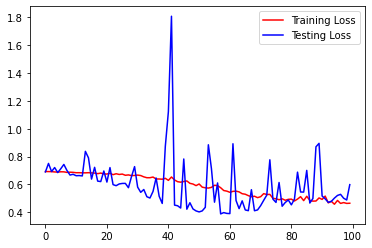

In [38]:
plt.plot(history.history['loss'], color='red', label="Training Loss")
plt.plot(history.history['val_loss'], color='blue', label="Testing Loss")
plt.legend()
plt.show()

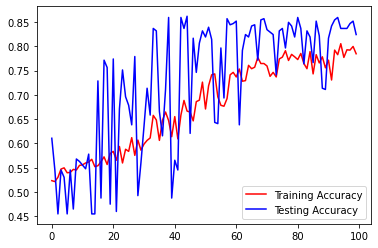

In [39]:
plt.plot(history.history['accuracy'], color='red', label="Training Accuracy")
plt.plot(history.history['val_accuracy'], color='blue', label="Testing Accuracy")
plt.legend()
plt.show()

In [40]:
model.save("dense.h5")

# LSTM

In [41]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1])

In [42]:
y_test.iloc[0]

0

In [43]:
X_train_lstm = []
y_train_lstm = []
for i in range(1, 1592):
    X_train_lstm.append(X_train[i-1:i, :])
    y_train_lstm.append(y_train.iloc[i])

X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 3))

In [44]:
len(X_test)

398

In [45]:
X_test_lstm = []
y_test_lstm = []
for i in range(1, 398):
    X_test_lstm.append(X_test[i-1:i, :])
    y_test_lstm.append(y_test.iloc[i])

X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 3))

In [46]:
model_lstm=Sequential()
model_lstm.add(LSTM(10,return_sequences=True,input_shape = (X_train_lstm.shape[1], 3)))
model_lstm.add(LSTM(10))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [47]:
history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, epochs = 100, batch_size = 32, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/100
50/50 [==============================] - 10s 39ms/step - loss: 0.6930 - accuracy: 0.5129 - val_loss: 0.6921 - val_accuracy: 0.5466
Epoch 2/100
50/50 [==============================] - 1s 13ms/step - loss: 0.6925 - accuracy: 0.5261 - val_loss: 0.6911 - val_accuracy: 0.5466
Epoch 3/100
50/50 [==============================] - 1s 11ms/step - loss: 0.6924 - accuracy: 0.5261 - val_loss: 0.6906 - val_accuracy: 0.5466
Epoch 4/100
50/50 [==============================] - 1s 10ms/step - loss: 0.6921 - accuracy: 0.5261 - val_loss: 0.6903 - val_accuracy: 0.5466
Epoch 5/100
50/50 [==============================] - 1s 10ms/step - loss: 0.6919 - accuracy: 0.5261 - val_loss: 0.6900 - val_accuracy: 0.5466
Epoch 6/100
50/50 [==============================] - 1s 10ms/step - loss: 0.6919 - accuracy: 0.5261 - val_loss: 0.6898 - val_accuracy: 0.5466
Epoch 7/100
50/50 [==============================] - 1s 10ms/step - loss: 0.6919 - accuracy: 0.5261 - val_loss: 0.6897 - val_accuracy: 0.5466
Epoch

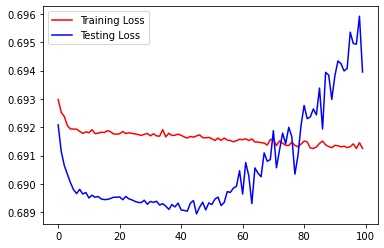

In [48]:
plt.plot(history_lstm.history['loss'], color='red', label="Training Loss")
plt.plot(history_lstm.history['val_loss'], color='blue', label="Testing Loss")
plt.legend()
plt.show()

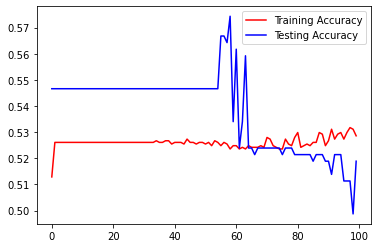

In [49]:
plt.plot(history_lstm.history['accuracy'], color='red', label="Training Accuracy")
plt.plot(history_lstm.history['val_accuracy'], color='blue', label="Testing Accuracy")
plt.legend()
plt.show()